<a href="https://colab.research.google.com/github/vivianusdjpy/DS2-CORE-IP-WEEK-3/blob/master/WEEK_3_INDEPENDENT_PROJECT_SAMPLING_IMPLEMENTATION_STRATEGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US BORDER CROSSING ANALYSIS

In [0]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

# LOADING THE DATASET

In [76]:
df = pd.read_csv("/content/Border_Crossing_Entry_Data.csv")
df.head(150)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
145,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Truck Containers Full,437,POINT (-73.44253 44.990010000000005)
146,Calais,Maine,115,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,18,POINT (-67.27917 45.18889)
147,Piegan,Montana,3316,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,8140,POINT (-113.43406 48.85152)
148,Northgate,North Dakota,3406,US-Canada Border,03/01/2019 12:00:00 AM,Truck Containers Empty,534,POINT (-102.39634 48.89848)


In [59]:
df.describe()


,Port Code,Value
count,346733.000000,3.467330e+05
mean,2455.504910,2.818767e+04
std,1201.208459,1.518588e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,9.000000e+01
75%,3402.000000,2.483000e+03
max,4105.000000,4.447374e+06


# DATA CLEANING

In [60]:
df['State'].describe()
#15 unique states

count           346733
unique              15
top       North Dakota
freq             57071
Name: State, dtype: object

In [61]:
df['Date'].max()


'12/01/2018 12:00:00 AM'

In [62]:
df['Port Name'].describe()
#116 unique port names

count       346733
unique         116
top       Eastport
freq          5541
Name: Port Name, dtype: object

In [63]:
df['Port Code'].unique()
#117 port ID's

array([2507,  108, 2506, 2604,  715,  109, 3401, 2309, 3403,  712, 3317,
       3404, 3430,  209, 3409, 3323, 3023,  105, 2504, 3309,  206,  115,
        704, 3019, 3415, 3013, 2505, 3302, 3407, 2310, 2603, 2410, 3301,
       3308,  211, 3803, 3413, 2307, 2302, 2606,  212, 3322,  106, 3025,
        107, 3420, 3419, 3004, 2601, 3802,  127, 2408, 2602, 3426, 3103,
       3417, 3020, 3424,  110, 3613,  901, 2503, 3425, 3406, 3414, 3016,
       3801,  104, 3410, 3306, 3422, 3015, 3009,  708, 2303, 3421, 3310,
       3316, 2404, 2402, 3007, 2608, 3012, 3011, 3423, 3321, 3416,  118,
       2502, 2305,  203, 3017,  103, 3604, 3405, 2406, 2301, 2403,  701,
       3010, 3319, 3325, 3318, 2304, 3408, 3102, 3104, 3106, 2582, 3014,
       3814,  101,  706, 4105, 3312, 3402,  112])

In [64]:
df['Border'].describe()
#There are two main ports of entry into the united states and the most popular is US-Canada Border

count               346733
unique                   2
top       US-Canada Border
freq                266187
Name: Border, dtype: object

In [65]:
df['Measure'].describe()
#most of the entry into the US is by personal vehicles

count                346733
unique                   12
top       Personal Vehicles
freq                  30219
Name: Measure, dtype: object

In [66]:
df['Location'].describe()
#there are 224 unique locations 

count                   346733
unique                     224
top       POINT (-83.04 42.32)
freq                      3069
Name: Location, dtype: object

In [67]:
df['Value'].sum()

9773594842

# VISUALIZATION AND NORMALITY TESTS

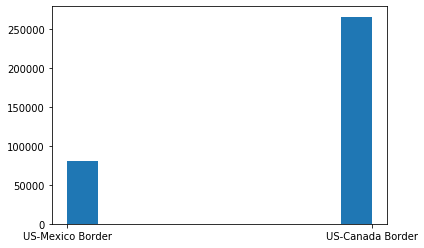

In [68]:
#Using histograms to visualize the distribution of entry into the US via the two major ports of entry
pyplot.hist(df['Border'])
pyplot.show()

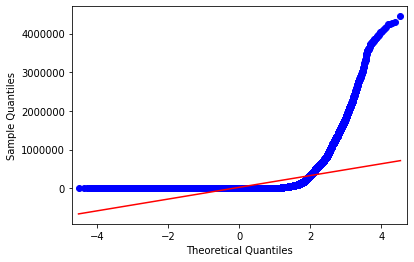

In [69]:
#Using Q-Q Plot to check for normality in the data
qqplot(df['Value'], line='s')
pyplot.show()

In [70]:
df_1 = df.groupby(df['Measure'])
df_1.count()
#The table below gives the distribution of values in the population based on the Measure column

,Port Name,State,Port Code,Border,Date,Value,Location
Measure,,,,,,,
Bus Passengers,28820,28820,28820,28820,28820,28820,28820
Buses,28822,28822,28822,28822,28822,28822,28822
Pedestrians,28697,28697,28697,28697,28697,28697,28697
Personal Vehicle Passengers,30196,30196,30196,30196,30196,30196,30196
Personal Vehicles,30219,30219,30219,30219,30219,30219,30219
Rail Containers Empty,27684,27684,27684,27684,27684,27684,27684
Rail Containers Full,27657,27657,27657,27657,27657,27657,27657
Train Passengers,27623,27623,27623,27623,27623,27623,27623
Trains,27708,27708,27708,27708,27708,27708,27708


In [71]:
df_1 = df.groupby(df['Port Name'])
df_1.count()

,State,Port Code,Border,Date,Measure,Value,Location
Port Name,,,,,,,
Alcan,3187,3187,3187,3187,3187,3187,3187
Alexandria Bay,3186,3186,3186,3186,3186,3186,3186
Algonac,20,20,20,20,20,20,20
Ambrose,3063,3063,3063,3063,3063,3063,3063
Anacortes,2021,2021,2021,2021,2021,2021,2021
...,...,...,...,...,...,...,...
Westhope,3124,3124,3124,3124,3124,3124,3124
Whitetail,2592,2592,2592,2592,2592,2592,2592
Whitlash,3093,3093,3093,3093,3093,3093,3093


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


# GROUPING THE DATA IN YEARS

In [102]:
#changing the year column to date_time
df['Date'] =  pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null datetime64[ns]
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 21.2+ MB


In [103]:
#group by years to find the count entries  per year
df_2 = df.groupby(df['Date'].dt.year)
df_2.count()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
Date,,,,,,,,
1996,14832,14832,14832,14832,14832,14832,14832,14832
1997,14832,14832,14832,14832,14832,14832,14832,14832
1998,14832,14832,14832,14832,14832,14832,14832,14832
1999,14832,14832,14832,14832,14832,14832,14832,14832
2000,14832,14832,14832,14832,14832,14832,14832,14832
2001,14832,14832,14832,14832,14832,14832,14832,14832
2002,14832,14832,14832,14832,14832,14832,14832,14832
2003,15588,15588,15588,15588,15588,15588,15588,15588
2004,15984,15984,15984,15984,15984,15984,15984,15984


In [114]:
pyplot.hist(df['Date'].dt.year)
pyplot.show()

TypeError: ignored

In [0]:
df_2.plot(x='Date', y='Value', kind='bar') 
plt.show()